In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter #hmm
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df['custcat'].value_counts() #like a frequency table

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BE9963128>]],
      dtype=object)

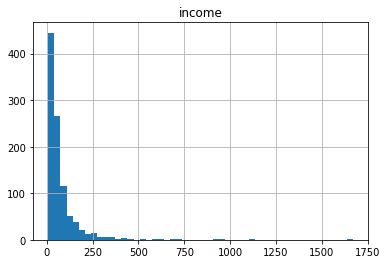

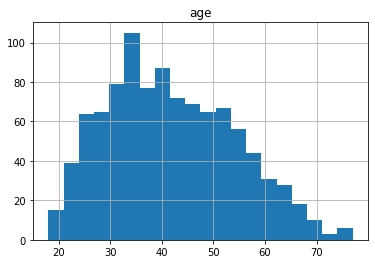

In [15]:
df.hist(column = 'income', bins = 50)
df.hist(column = 'age', bins = 20)

In [20]:
for col in df:
    arr = df[col].value_counts()
    print(arr)

3    344
2    334
1    322
Name: region, dtype: int64
72    31
3     20
24    20
48    20
13    19
22    19
20    19
16    19
5     19
4     19
42    18
33    18
60    18
7     18
10    18
45    18
19    17
50    17
17    17
38    17
71    17
65    17
61    16
67    16
25    15
26    15
28    15
6     15
9     15
23    14
      ..
53    13
52    13
35    13
39    12
59    12
11    12
55    12
49    12
70    11
64    11
62    11
12    11
31    11
30    11
44    11
41    11
51    10
46    10
58    10
57     9
68     9
43     8
40     8
66     8
27     8
47     7
2      7
36     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64
33    39
39    35
35    34
34    32
31    32
37    31
40    28
42    28
30    26
52    25
36    25
45    24
46    24
27    24
43    24
48    24
54    24
41    24
50    23
25    23
51    23
28    22
38    21
32    21
26    21
47    21
55    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
60    11
61    1

In [21]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [25]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 
        'employ','retire', 'gender', 'reside']] .values  #.astype(float)
#above converts pandas dataframe to numpy array. necesary to use scikitlearn
#remember that those double brackets are needed for getting multiple columns
#each column can be thought of as its own "list"
X[0:5]
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [32]:
X[0:5]#these are just the first 5 rows

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [41]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [44]:
#Normalize the data
#Data standardization give data zero mean and unit cveraince, good practice for algos like KNN based on distance of cases
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [50]:
from sklearn.model_selection import train_test_split
#So i suppose the below command does the splitting automatically, as we have done manually before
#it takes in the dataset X being inpedent variables, y being depednet. Test size. 0.2 indicates 20% testing. random_state idk
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
#shape is array dimensions

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [52]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [56]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [60]:
#Accuracy
from sklearn import metrics
print("Train set accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set accuracy:  0.5475
Test set accuracy:  0.32


In [69]:
#With k =6
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 6
#print(dir(KNeighborsClassifier))#just a python thing. shows attributes of a class
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)#training on train data we split before
neigh
yhat = neigh.predict(X_test)#now we can predict stuff with it so cool
print("Train set accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test,yhat))
#wow it's even worse

Train set accuracy:  0.51625
Test set accuracy:  0.31


In [73]:
#Finding the best K
Ks = 10
mean_acc = np.zeros((Ks-1))#just a fancy zero array. ugh *eye roll*
std_acc = np.zeros((Ks-1))
ConsfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

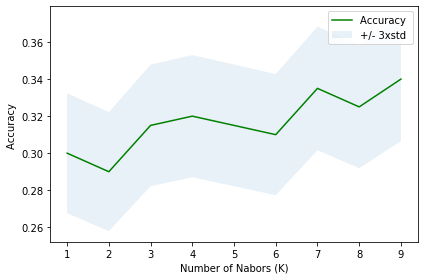

In [80]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc -1*std_acc,mean_acc+1*std_acc, alpha = .10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [86]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k = 9
